## Importing the libraries

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#### Reading/Importing the dataset

In [226]:
Sales1 = pd.read_excel("C:/Users/Shruthi/Downloads/case_study.xlsx")

#### understanding the dataset

In [227]:
Sales1.columns

Index(['SKU', 'ISO_Week', 'Sales', 'Season'], dtype='object')

#### To know the data type of each variable 


In [228]:
Sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SKU         150 non-null object
ISO_Week    150 non-null object
Sales       143 non-null float64
Season      150 non-null object
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


##### from the above information, we could see certain missing values present

In [229]:
Sales1.shape 

(150, 4)

In [230]:
Sales1.describe()

,Sales
count,143.000000
mean,5279.776224
std,6184.437917
min,-163.000000
25%,290.500000
50%,4341.000000
75%,10191.500000
max,52524.000000


In [231]:


Sales1.head()

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
4,ProductA,2018-04,6988.0,WINTER


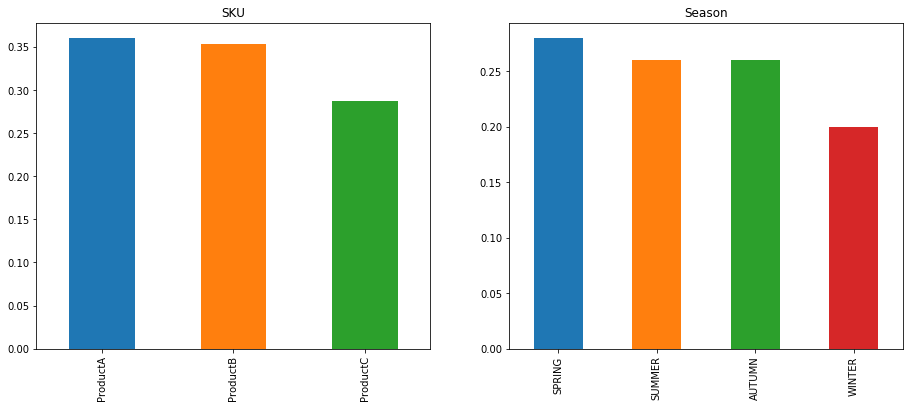

In [232]:
plt.figure(1)
plt.subplot(131)
Sales1['SKU'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'SKU')

plt.subplot(132)
Sales1['Season'].value_counts(normalize=True).plot.bar(title= 'Season')

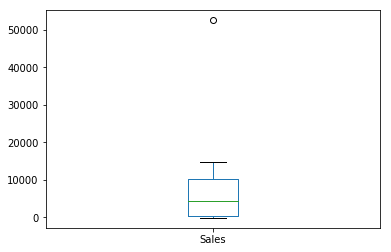

In [233]:
Sales1['Sales'].plot.box()


In [234]:
Sales1['Season'].value_counts()

SPRING    42
SUMMER    39
AUTUMN    39
WINTER    30
Name: Season, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F003198>]],
      dtype=object)

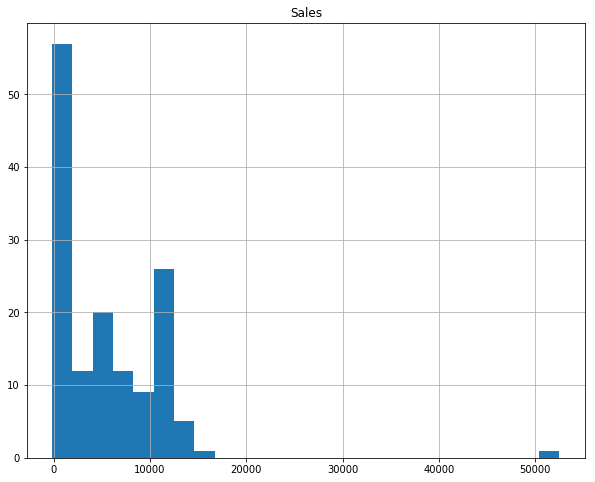

In [235]:
Sales1.hist(figsize=(10,8),bins=25)

##### As there are some duplicate values, missing values with entries 0, we will remove those values 

In [236]:
#Removing the duplicate values
data1 = Sales1.drop_duplicates() 

In [237]:
data1.head()

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
5,ProductA,2018-05,6743.0,WINTER


###### We could see the 0 entries are present in data sent from the above output, so lets remove the Zero's

In [238]:
# Now Lets remove the entries zero values "ZERO REMOVAL"
data2 =data1[data1.Sales != 0] 

In [239]:
data2.head()

,SKU,ISO_Week,Sales,Season
3,ProductA,2018-04,6988.0,WINTER
5,ProductA,2018-05,6743.0,WINTER
6,ProductA,2018-06,4112.0,WINTER
7,ProductA,2018-07,5732.0,WINTER
8,ProductA,2018-08,NaN,WINTER


###### from the above output we could see that the zero's entries has been removed!!

In [240]:
data2.shape

(126, 4)

###### From the above output,we can say that there were 4 duplicate entries and 20 entries with zero values

# Converting the categorical values to Numerical values

In [241]:
cat_num = {"SKU":     {"ProductA": 1, "ProductB": 2, "ProductC": 3},
               "Season": {"WINTER": 1, "SPRING": 2, "SUMMER": 3, "AUTUMN": 4}}



In [ ]:
data2.replace(cat_num, inplace=True)


In [217]:
data2.head()
#Now we have converted the categorical values to the numberic values

,SKU,ISO_Week,Sales,Season
3,1,201804,6988.0,1
5,1,201805,6743.0,1
6,1,201806,4112.0,1
7,1,201807,5732.0,1
8,1,201808,5363.0,1


###### Now lets convert the object  type "ISO_Week" to integer by using the below code

In [112]:
data2['ISO_Week'] = data2['ISO_Week'].str.replace(r'\D', '').astype(int)


C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
data2.info()
#Now we have converted the 'ISO_Week' OBJECT TO INTEGER

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 3 to 149
Data columns (total 4 columns):
SKU         126 non-null int64
ISO_Week    126 non-null int32
Sales       119 non-null float64
Season      126 non-null int64
dtypes: float64(1), int32(1), int64(2)
memory usage: 4.4 KB


In [198]:
#initialising the mean of ProductC
mean = 9127

In [199]:
# defining conditions and values
#Median of ProductA = 6568, ProductB = 317
conditions = [data2['SKU'] == 1, data2['SKU'] == 2]
values = [6568, 361]

In [200]:
# apply logic where company_type is null
data2["Sales"] = np.where(data2["Sales"].isnull(),
                              np.select(conditions, values),
                              data2["Sales"])

C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [201]:
#imputing mean = 9127 of ProductC for the outliers 
data2 ["Sales"] = np.where(data2 ["Sales"] >50000, mean,data2 ["Sales"])

C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


###### As there are certain NaN values present in the sales column, So tried to impute median() or mean() values where NaN values were present using the below code

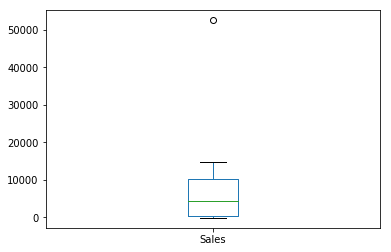

In [162]:
Sales1['Sales'].plot.box()


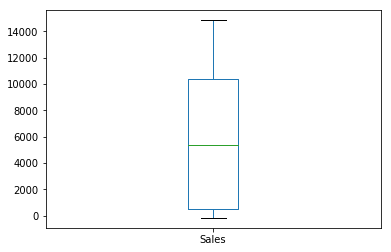

In [161]:
data2['Sales'].plot.box()

#### From the above first graph, I could see that their is an effect of OUTLIERS which varies from the range, so imputed the median value in place of outliers so that it wont affect our model which can be visulized in second graph

In [121]:
#data2 ["Sales"] = np.where(data2 ["Sales"] >50000, median,data2 ["Sales"])


C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


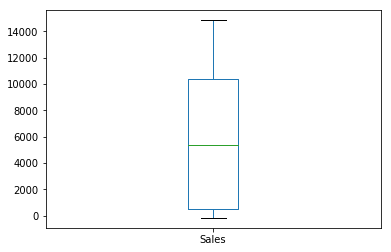

In [123]:
#Now I have cleared the outliers
data2['Sales'].plot.box()

In [163]:
data2.describe()

,SKU,ISO_Week,Sales,Season
count,126.000000,126.000000,126.000000,126.000000
mean,1.944444,201828.571429,5735.206349,2.611111
std,0.851404,14.456793,4529.466744,1.087913
min,1.000000,201801.000000,-163.000000,1.000000
25%,1.000000,201817.000000,484.000000,2.000000
50%,2.000000,201829.000000,5363.000000,3.000000
75%,3.000000,201840.750000,10362.750000,4.000000
max,3.000000,201852.000000,14853.000000,4.000000


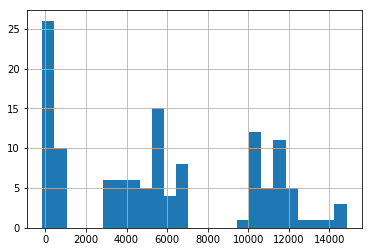

In [164]:
data2['Sales'].hist(bins=25)

# Splitting the dataset as per the promotional datails and non promotional details 

In [129]:
Promo = data2[(data2.Sales >= 10000)]

In [131]:
Promo

,SKU,ISO_Week,Sales,Season
11,1,201811,11709.0,2
12,1,201812,10410.0,2
13,1,201813,10211.0,2
14,1,201814,10378.0,2
15,1,201815,10012.0,2
17,1,201816,10178.0,2
18,1,201817,11316.0,2
20,1,201819,11384.0,2
21,1,201820,10470.0,2
25,1,201824,10777.0,3


In [133]:
NonPromo = data2[(data2.Sales <= 10000)]

In [134]:
NonPromo

,SKU,ISO_Week,Sales,Season
3,1,201804,6988.0,1
5,1,201805,6743.0,1
6,1,201806,4112.0,1
7,1,201807,5732.0,1
8,1,201808,5363.0,1
9,1,201809,5559.0,2
10,1,201810,5381.0,2
19,1,201818,5363.0,2
22,1,201821,5471.0,2
23,1,201822,4874.0,2


###### Spiltting the Dataset into Training and Tesing manually for both promotional and non-promotioanl data

In [141]:
#spilting the Promo dataset into training and test set
ptrain = Promo[(Promo.ISO_Week >= 201801) & (Promo.ISO_Week <= 201841)]


In [142]:
pTrain_X = ptrain[['SKU','ISO_Week','Season']]


In [143]:
pTrain_y = ptrain[['Sales']]

In [144]:
ptest = Promo[(Promo.ISO_Week >= 201842) & (Promo.ISO_Week <= 201852)]


In [145]:
ptest_X = ptest[['SKU','ISO_Week','Season']]


In [146]:
ptest_y = ptest[['Sales']]

In [148]:
#spilting the data set into training and testing for non-ptomotional data
ntrain = NonPromp[(NonPromp.ISO_Week >= 201801) & (NonPromp.ISO_Week <= 201841)]


In [149]:
nTrain_X = ntrain[['SKU','ISO_Week','Season']]

In [150]:
nTrain_y = ntrain[['Sales']]

In [151]:
ntest = NonPromp[(NonPromp.ISO_Week >= 201842) & (NonPromp.ISO_Week <= 201852)]

In [152]:
ntest_X = ntest[['SKU','ISO_Week','Season']]

In [153]:
ntest_y = ntest[['Sales']]

In [165]:
#Standizing the feature for promotional week
#Feature Scaling


In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(pTrain_X)
X_test = sc.transform(ptest_X)


# Model evaluation and prediction

In [168]:
#Liner Regression 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , pTrain_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [169]:
#Prediction
py_pred = regressor.predict(X_test)


In [171]:
regressor.score(X_train, pTrain_y)

0.08058927368422131

In [172]:
regressor.score(X_test,ptest_y)

-2.5386431095030897

In [173]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state = 0)
DT.fit(X_train , pTrain_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [175]:
#Prediction
py_pred_dt = DT.predict(X_test)


In [176]:
DT.score(X_train, pTrain_y)

1.0

In [177]:
DT.score(X_test,ptest_y)

-1.8166236005631053

In [178]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=20, random_state=0)  
RF.fit(X_train , pTrain_y)

C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [196]:
#Prediction
py_pred_rf = RF.predict(X_test)

In [180]:
RF.score(X_train, pTrain_y)


0.8358575027725451

In [181]:
RF.score(X_test,ptest_y)

-1.049455386482196

In [182]:
#Standizing the feature for non-promotional week
#Feature Scaling

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
nX_train = sc.fit_transform(nTrain_X)
nX_test = sc.transform(ntest_X)


In [184]:
#Liner Regression for nonpromotional data  

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(nX_train , nTrain_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [185]:
ny_pred = regressor.predict(nX_test)

In [186]:
regressor.score(nX_train, nTrain_y)

0.13476788401209105

In [187]:
regressor.score(nX_test,ntest_y)

-0.07587411562514124

In [188]:
#Decision Tree for non promotional data 

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state = 0)
DT.fit(nX_train , nTrain_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [189]:
ny_pred_dt = DT.predict(nX_test)

In [190]:
DT.score(nX_train, nTrain_y)

1.0

In [191]:
DT.score(nX_test,ntest_y)

0.6377260243336408

In [192]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=20, random_state=0)  
RF.fit(nX_train , nTrain_y)

C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [193]:
ny_pred_rf = RF.predict(nX_test)

In [194]:
RF.score(nX_train, nTrain_y)

0.9681223947336448

In [195]:
RF.score(nX_test,ntest_y)

0.6493877160801833

# While comparing with different models like Linear Regression, Decision Tree, Random forest for the promotional and Non-promotional Data 

###### - Based on the prediction from the accuracy calculation, we can conclude that the accuracy Random Forest better when compared to the other two models


###### - Considering the accuracy, I conclude that that the Random Forest Models fits the data better- Considering the accuracy, I conclude that that the Random Forest Models fits the data better